In [1]:
#Fichier rackuten_project_lib.py contient les packages  
from rackuten_project_lib import *

## DATA VIZ Text

In [1]:
# path_input : directory où se trouve le pkl of cleaned text
path= 'D:/DataScienTest_WorkSpace/WS/Travail_Final/Datasets/'


***Read saved cleaned text***

In [3]:
xtrain = pd.read_pickle(path + 'x_train_cleaned_V0.pkl')

NameError: name 'pd' is not defined

In [4]:
ytrain = pd.read_pickle(path + 'ytrain_V0.pkl')

In [5]:
xtrain.head()

designation  \
0  Olivia: Personalisiertes Notizbuch / 150 Seite...   
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   
2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
3  Peluche Donald - Europe - Disneyland 2000 (Mar...   
4                               La Guerre Des Tuques   

                                         description   productid     imageid  \
0                                               <NA>  3804725264  1263597046   
1                                               <NA>   436067568  1008141237   
2  PILOT STYLE Touch Pen de marque Speedlink est ...   201115110   938777978   
3                                               <NA>    50418756   457047496   
4  Luc a des id&eacute;es de grandeur. Il veut or...   278535884  1077757786   

                                                text  
0  olivia personalisiertes notizbuch seiten punkt...  
1  journal arts art marche salon art asiatique pa...  
2  grand stylet ergonomique bleu gamepad nintendo...  
3  peluche donald europe disneyland marionnette d...  
4  guerre tuques luc grandeur veut organiser jeu ...

In [6]:
ytrain.head()

prdtypecode
0           10
1         2280
2           50
3         1280
4         2705

In [7]:
np.round(xtrain.isna().sum()*100/len(xtrain),2)

designation     0.00
description    35.09
productid       0.00
imageid         0.00
text            0.00
dtype: float64

In [8]:
df_nan = pd.DataFrame(xtrain.isna().sum()*100/len(xtrain))
df_nan = df_nan.round(2)
df_nan
df_nan[0] = df_nan[0].astype(str) + '%'
df_nan
df_nan.sort_index(ascending=False)

0
text           0.0%
productid      0.0%
imageid        0.0%
designation    0.0%
description  35.09%

***Concatenate x_Train and y_train to get class***

In [9]:
train = pd.concat([xtrain,ytrain], axis=1)
train.head(5)

designation  \
0  Olivia: Personalisiertes Notizbuch / 150 Seite...   
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   
2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
3  Peluche Donald - Europe - Disneyland 2000 (Mar...   
4                               La Guerre Des Tuques   

                                         description   productid     imageid  \
0                                               <NA>  3804725264  1263597046   
1                                               <NA>   436067568  1008141237   
2  PILOT STYLE Touch Pen de marque Speedlink est ...   201115110   938777978   
3                                               <NA>    50418756   457047496   
4  Luc a des id&eacute;es de grandeur. Il veut or...   278535884  1077757786   

                                                text  prdtypecode  
0  olivia personalisiertes notizbuch seiten punkt...           10  
1  journal arts art marche salon art asiatique pa...         2280  
2  grand stylet ergonomique bleu gamepad nintendo...           50  
3  peluche donald europe disneyland marionnette d...         1280  
4  guerre tuques luc grandeur veut organiser jeu ...         2705

# Create WorldCoulds for all class

In [10]:
unique, counts = np.unique(train['prdtypecode'], return_counts=True)
dict(zip(unique, counts))

{10: 3116,
 40: 2508,
 50: 1681,
 60: 832,
 1140: 2671,
 1160: 3953,
 1180: 764,
 1280: 4870,
 1281: 2070,
 1300: 5045,
 1301: 807,
 1302: 2491,
 1320: 3241,
 1560: 5073,
 1920: 4303,
 1940: 803,
 2060: 4993,
 2220: 824,
 2280: 4760,
 2403: 4774,
 2462: 1421,
 2522: 4989,
 2582: 2589,
 2583: 10209,
 2585: 2496,
 2705: 2761,
 2905: 872}

In [11]:
train['prdtypecode'].unique()

array([  10, 2280,   50, 1280, 2705, 2522, 2582, 1560, 1281, 1920, 2403,
       1140, 2583, 1180, 1300, 2462, 1160, 2060,   40,   60, 1320, 1302,
       2220, 2905, 2585, 1940, 1301], dtype=int64)

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# Définir le calque du nuage des mots
wc = WordCloud(background_color="black", max_words=100, max_font_size=50, random_state=42)

designation description  \
0    Olivia: Personalisiertes Notizbuch / 150 Seite...        <NA>   
6           Christof E: Bildungsprozessen Auf Der Spur        <NA>   
46   Vassivière -En-Limousin.  Le Jardin Art Et Lie...        <NA>   
131    Dr. Mercurius' Heilsame Reise Zum Planeten Erde        <NA>   
188                               La Promenade Au Parc        <NA>   

      productid     imageid  \
0    3804725264  1263597046   
6      91920807   907794536   
46    444108636  1010065513   
131  1807806498  1204663650   
188   125293048   880172152   

                                                  text  prdtypecode  
0    olivia personalisiertes notizbuch seiten punkt...           10  
6                      christof bildungsprozessen spur           10  
46         vassiviere limousin jardin art lieu memoire           10  
131             mercurius heilsame reise planeten erde           10  
188                                     promenade parc           10

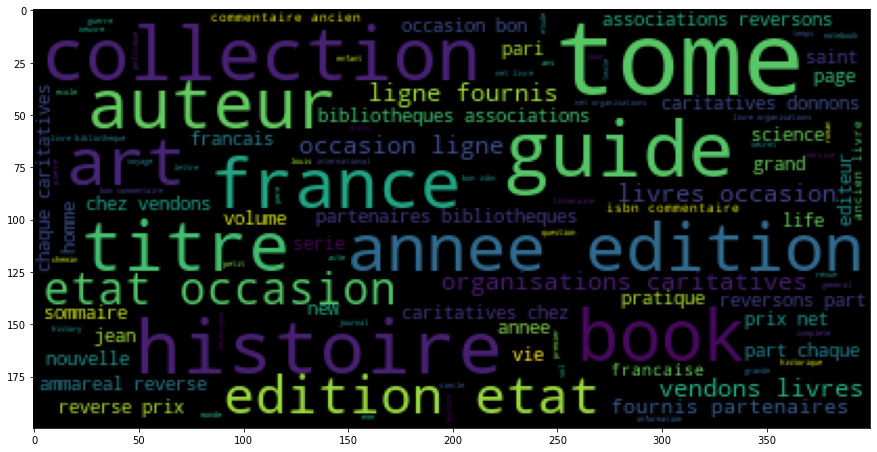

In [13]:
classe_10 = train[train['prdtypecode']==10]
display(classe_10.head(5))

text_classe_10 = ""
for words in classe_10.text : 
    text_classe_10 += words

# Générer et afficher le nuage de mots pour la colonne DESIGNATION

plt.figure(figsize= (15,15)) # Initialisation d'une figure
wc.generate(text_classe_10)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

designation description  productid  \
1   Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...        <NA>  436067568   
5   Afrique Contemporaine N° 212 Hiver 2004 - Doss...        <NA>    5862738   
19  Monde Illustre (Le) N° 3083 Du 20/01/1917 - L'...        <NA>  570628142   
28  Univers (L') N° 249 Du 12/09/1854 - France - P...        <NA>  570663184   
44  Diagrammes N° 26 Du 01/04/1959 - Le Siecle Du ...        <NA>  569725834   

       imageid                                               text  prdtypecode  
1   1008141237  journal arts art marche salon art asiatique pa...         2280  
5    393356830          afrique contemporaine hiver dossier japon         2280  
19  1027257229  monde illustre emprunt victoire angleterre mee...         2280  
28  1027317460  univers france paris septembre lac protestatio...         2280  
44  1027001857  diagrammes siecle petrole guillerme claude hen...         2280

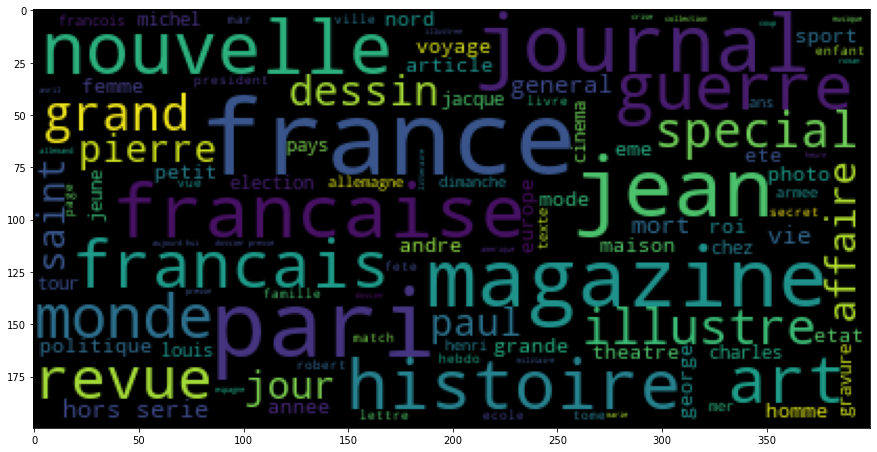

In [14]:
classe_2280 = train[train['prdtypecode']==2280]
display(classe_2280.head(5))

text_classe_2280 = ""
for words in classe_2280.text : 
    text_classe_2280 += words

# Générer et afficher le nuage de mots pour la colonne DESIGNATION

plt.figure(figsize= (15,15)) # Initialisation d'une figure
wc.generate(text_classe_2280)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

designation  \
2    Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
80   Contrôleur De Jeu Mobile Tir Sensible Et But J...   
163      Fauteuil De Bureau Gaming Swift Noir Et Rouge   
165  Sony Dualshock 4 V2 - Gamepad - Sans Fil - Blu...   
207  Manette Filaire Ps3 / Pc Shockpad Ghx5ef Shock...   

                                           description   productid  \
2    PILOT STYLE Touch Pen de marque Speedlink est ...   201115110   
80   Contrôleur de jeu mobile Tir sensible et But J...  3885602739   
163                                               <NA>  2792163142   
165                                               <NA>  2476577455   
207  Manette filaire compatible PS3 / PC ShockPad r...  3149281609   

        imageid                                               text  \
2     938777978  grand stylet ergonomique bleu gamepad nintendo...   
80   1258507989  controleur jeu mobile tir sensible joysticks p...   
163  1172463223            fauteuil bureau gaming swift noir rouge   
165  1144198526  sony dualshock gamepad fil bluetooth bleu play...   
207  1194537163  manette filaire shockpad ghx shock gamehoo fil...   

     prdtypecode  
2             50  
80            50  
163           50  
165           50  
207           50

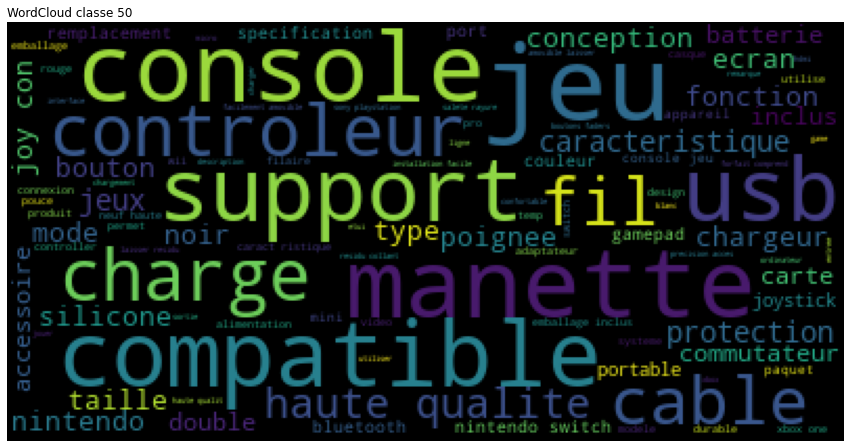

In [15]:
classe_50 = train[train['prdtypecode']==50]
display(classe_50.head(5))

text_classe_50 = ""
for words in classe_50.text : 
    text_classe_50 += words

# Générer et afficher le nuage de mots pour la colonne DESIGNATION

plt.figure(figsize= (15,15)) # Initialisation d'une figure
wc.generate(text_classe_50)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.title('WordCloud classe 50', loc='left')
plt.axis('off')
plt.show()

designation  \
3   Peluche Donald - Europe - Disneyland 2000 (Mar...   
8           Puzzle Scooby-Doo Avec Poster 2x35 Pieces   
21                     Glitter Beach Barbie By Barbie   
26  Modèle De Voiture 4pcs Alliage Métallique 1.9i...   
49  100pcs Premium Bâtons Bracelets Neon Light Glo...   

                                          description   productid     imageid  \
3                                                <NA>    50418756   457047496   
8                                                <NA>  4239126071  1325918866   
21    Original Barbie Doll. Contains glitter lotion..  3228900895  1199384348   
26  4pcs alliage métallique 1.9in jante de roue po...  4137059841  1297749086   
49  100PCS premium Bâtons Bracelets Neon Light Par...  3748234383  1240783666   

                                                 text  prdtypecode  
3   peluche donald europe disneyland marionnette d...         1280  
8                     puzzle scooby doo poster pieces         1280  
21  glitter beach barbie original doll contains gl...         1280  
26  modele voiture pcs alliage metallique jante ro...         1280  
49  pcs premium batons bracelets neon light glowin...         1280

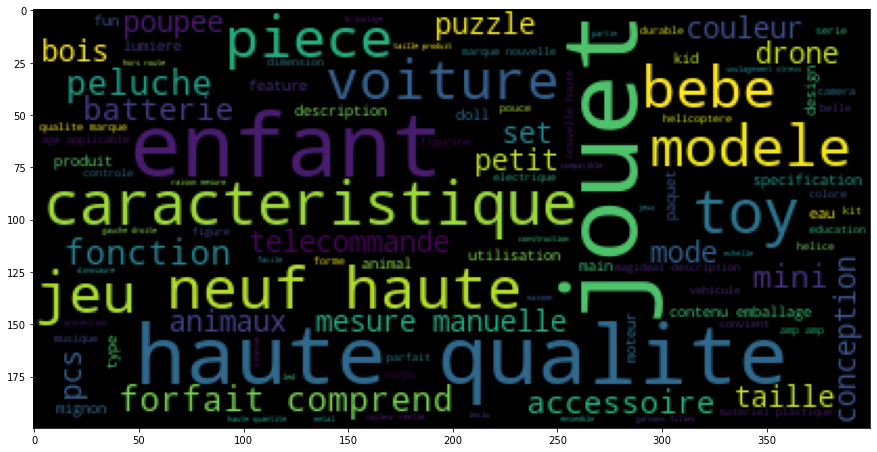

In [16]:
classe_1280 = train[train['prdtypecode']==1280]
display(classe_1280.head(5))

text_classe_1280 = ""
for words in classe_1280.text : 
    text_classe_1280 += words

# Générer et afficher le nuage de mots pour la colonne DESIGNATION

plt.figure(figsize= (15,15)) # Initialisation d'une figure
wc.generate(text_classe_1280)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

designation  \
4                                 La Guerre Des Tuques   
56                 Ne Regardez Pas Le Voleur Qui Passe   
111  Les Crimes Secrets De Napoléon Buonaparte - Fa...   
141  En Écoutant Tolstoï ; Entretiens Sur La Guerre...   
144  Les Révélations Du Crime Ou Cambray Et Ses Com...   

                                           description   productid  \
4    Luc a des id&eacute;es de grandeur. Il veut or...   278535884   
56   Depuis quatre ans le mensuel Marie Claire orga...   476383013   
111                                               <NA>  2537777042   
141                                               <NA>  2142477536   
144                                               <NA>  1350498866   

        imageid                                               text  \
4    1077757786  guerre tuques luc grandeur veut organiser jeu ...   
56   1071868057  regardez voleur passe quatre ans mensuel marie...   
111  1148188616  crimes secrets napoleon buonaparte faits histo...   
141  1128331298          ecoutant tolstoi entretiens guerre sujets   
144  1075612752                revelations crime cambray complices   

     prdtypecode  
4           2705  
56          2705  
111         2705  
141         2705  
144         2705

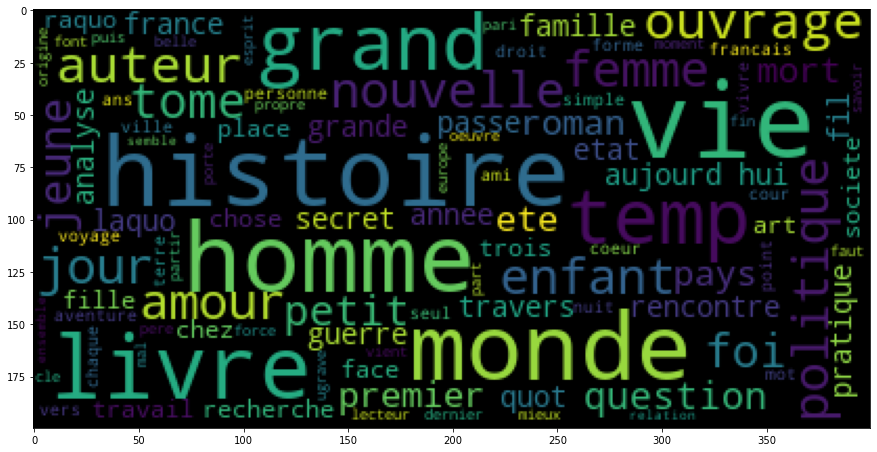

In [17]:
classe_2705 = train[train['prdtypecode']==2705]
display(classe_2705.head(5))

text_classe_2705 = ""
for words in classe_2705.text : 
    text_classe_2705 += words

# Générer et afficher le nuage de mots pour la colonne DESIGNATION

plt.figure(figsize= (15,15)) # Initialisation d'une figure
wc.generate(text_classe_2705)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

designation  \
7   Conquérant Sept Cahier Couverture Polypro 240 ...   
15       Zenith Pince Agrafeuse 591 N°10 Coloris Noir   
17                Mod Podge Dishwasher Safe Gloss 8oz   
27  Faber-Castell Lot De 3 Crayons De Couleur Poly...   
33  Lindner 2365-2115ce Coin Case Nera Xl With 3 T...   

                                          description   productid     imageid  \
7   CONQUERANT CLASSIQUE Cahier 240 x 320 mm seyès...   344240059   999581347   
15  Pince agrafeuse 591 N°10. Capot en ABS. Dispos...  3718150116  1237257586   
17                                               <NA>  2666371748  1156191369   
27  FABER-CASTELL Crayon de couleur POLYCHROMOS ve...  2536863974  1148154575   
33  Timeless elegance a clear design versatility f...  3817904723  1248853903   

                                                 text  prdtypecode  
7   conquerant sept cahier couverture polypro page...         2522  
15  zenith pince agrafeuse coloris noir agrafeuse ...         2522  
17                    mod podge dishwasher safe gloss         2522  
27  faber castell lot crayons couleur polychromos ...         2522  
33  lindner coin case nera trays black inserts rec...         2522

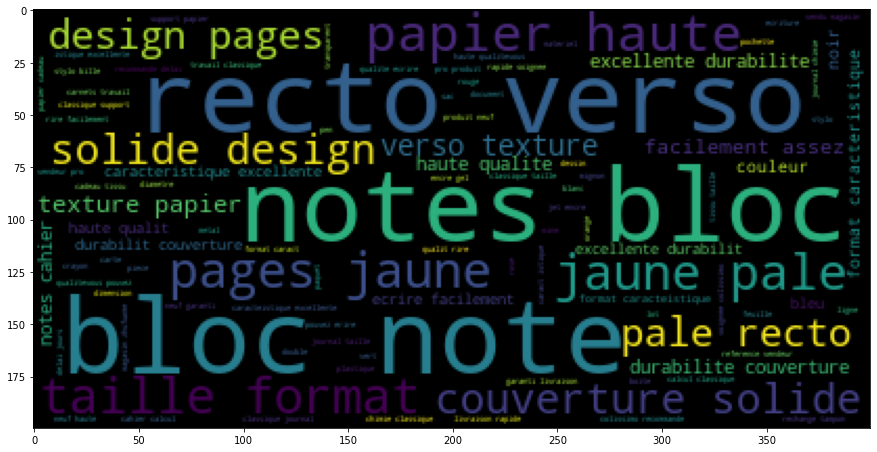

In [18]:
classe_2522 = train[train['prdtypecode']==2522]
display(classe_2522.head(5))

text_classe_2522 = ""
for words in classe_2522.text : 
    text_classe_2522 += words

# Générer et afficher le nuage de mots pour la colonne DESIGNATION

plt.figure(figsize= (15,15)) # Initialisation d'une figure
wc.generate(text_classe_2522)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

designation  \
9    Tente Pliante V3s5-Pro Pvc Blanc - 3 X 4m50 - ...   
73       Pot Marina Eda - Diamètre 25 Cm - 6 L - Rubis   
100  Garcia De Pou Housse Pour Vin 12x23 Cm Glase A...   
249  30 Led Lampes Solaires Extérieur Etanche Ip65 ...   
266                 Coussin Pour Banc De Jardin 985 Cm   

                                           description   productid  \
9    Tente pliante V3S5 Pro PVC 500 gr/m² - 3 x 4m5...  3793572222   
73   <b>Pot Marina Eda - Diamètre 25 cm - 6 l - Rub...  2823144007   
100  Fabriqué en acrylique - Mesure 12 cm de diamèt...  4223031202   
249  ?Largement utilisé? Parfait pour utiliser sur ...  3863212856   
266  Aspect : <br />Matériau principal : Polyester<...  3366179456   

        imageid                                               text  \
9    1245644185  tente pliante pro pvc blanc longueur largeur p...   
73   1166636908  pot marina eda diametre rubis pot rubismarque ...   
100  1321747763  garcia pou housse vin glase acrylique unites f...   
249  1254576212  led lampes solaires exterieur etanche spot sol...   
266  1208976070  coussin banc jardin aspect materiau principal ...   

     prdtypecode  
9           2582  
73          2582  
100         2582  
249         2582  
266         2582

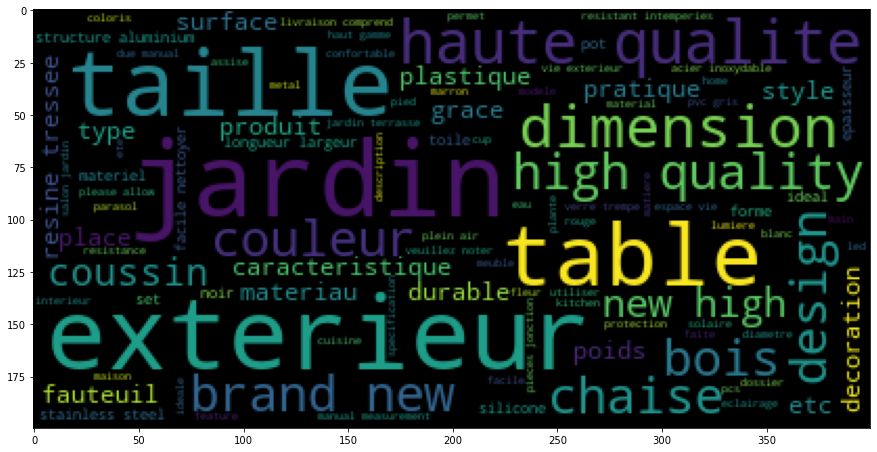

In [19]:
classe_2582 = train[train['prdtypecode']==2582]
display(classe_2582.head(5))

text_classe_2582 = ""
for words in classe_2582.text : 
    text_classe_2582 += words

# Générer et afficher le nuage de mots pour la colonne DESIGNATION

plt.figure(figsize= (15,15)) # Initialisation d'une figure
wc.generate(text_classe_2582)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

designation  \
10            Eames Inspired Sxw Chair - Pink - Black   
11  Fauteuil Chesterfield Brenton 100% Cuir De Buf...   
14  Matelas Mémoire De Forme 180x200 X 20 Cm Très ...   
32  2 Cagettes De Rangement Happy Life - 40 X 30 C...   
78  Crochets Plafond Crochets Coupe À Vis Des Croc...   

                                          description   productid     imageid  \
10  The timeless DSW seat can now be paired with m...  1915836983  1111840281   
11  Canapé et fauteuil chesterfield en cuir antiqu...  4127967621  1295816984   
14  MATELAS:<br />Â· Accueil : Ferme .<br />Â· Sou...  4108914287  1292441752   
32  Organisez et rangez de manière scandinave votr...  3079667218  1195260111   
78  Plafond Crochets Coupe à vis des crochets Plan...  4182265443  1310653112   

                                                 text  prdtypecode  
10  eames inspired sxw chair pink black timeless d...         1560  
11  fauteuil chesterfield brenton cuir buffle vert...         1560  
14  matelas memoire forme ferme dehoussable housse...         1560  
32  cagettes rangement happy life beige organisez ...         1560  
78  crochets plafond coupe vis suspendus plantes t...         1560

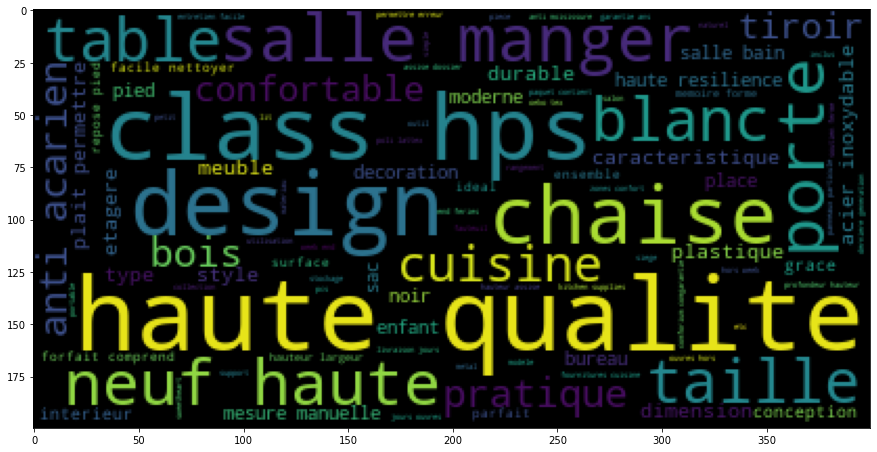

In [20]:
classe_1560 = train[train['prdtypecode']==1560]
display(classe_1560.head(5))

text_classe_1560 = ""
for words in classe_1560.text : 
    text_classe_1560 += words

# Générer et afficher le nuage de mots pour la colonne DESIGNATION

plt.figure(figsize= (15,15)) # Initialisation d'une figure
wc.generate(text_classe_1560)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

designation  \
12   Peaceable Kingdom Wheres Bear? The Hide And Fi...   
37   Nouveau 01h20 Échelle Alloy Mini Pull Back Voi...   
43   Non Toxique Effacer Slime Coul Beau Mélange Nu...   
52                                 Le Mot Le Plus Long   
135  Dinosaur Bubble Light Up Bulles Ventilat Avec ...   

                                           description   productid  \
12   pCan my 2-year-old play a game? Yes Each game ...  3287127001   
37   NOUVEAU 01h20 échelle Alloy Mini Pull Back Voi...  4007155304   
43   Non toxique Effacer Slime Couleur Beau mélange...  4006528698   
52                                                <NA>   272891494   
135  Dinosaur Bubble Light Up Bulles ventilateur av...  4006540302   

        imageid                                               text  \
12   1204199842  peaceable kingdom wheres bear hide find stacki...   
37   1275613423  echelle alloy mini pull back voiturette clubs ...   
43   1275678245  toxique effacer slime coul beau melange nuage ...   
52   1006538318                                           mot long   
135  1275716747  dinosaur bubble light bulles ventilat led flas...   

     prdtypecode  
12          1281  
37          1281  
43          1281  
52          1281  
135         1281

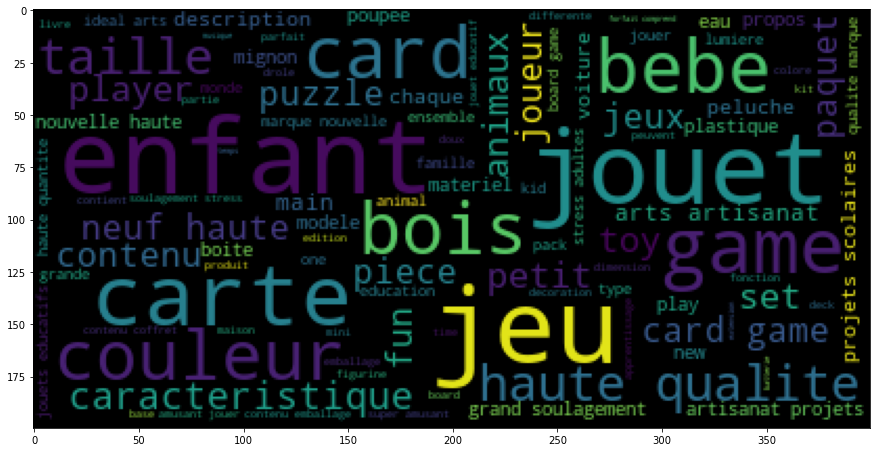

In [21]:
classe_1281 = train[train['prdtypecode']==1281]
display(classe_1281.head(5))

text_classe_1281 = ""
for words in classe_1281.text : 
    text_classe_1281 += words

# Générer et afficher le nuage de mots pour la colonne DESIGNATION

plt.figure(figsize= (15,15)) # Initialisation d'une figure
wc.generate(text_classe_1281)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

designation  \
13                Paire De Voilages Imprimés Fantaisie   
38   4pcs Décor Coussin Indépendance Style Jeter Co...   
45   Rideau A Oeillets Plastique Polyester Uni Esse...   
92   Coussin En Peluche Canapé Taille Coussin Throw...   
103  Canapé Mignon Lit Pour Chat Accueil Décoration...   

                                           description   productid  \
13   Paire de voilages droits fantaisie qui mettra ...  1882164320   
38   4pcs Décor Coussin Independence Day Style de T...  4012748163   
45   rêt-à-poser ce rideau s'installe facilement et...  2333136838   
92                                                <NA>  4159399664   
103  Chien mignon Canapé-lit Décoration Pillow Fest...  4004145763   

        imageid                                               text  \
13   1109088140  paire voilages imprimes fantaisie voilages dro...   
38   1276344493  pcs decor coussin independance style jeter cov...   
45   1136619798  rideau oeillets plastique polyester uni essent...   
92   1303739592  coussin peluche canape taille throw cover home...   
103  1275336103  canape mignon lit chat accueil decoration cous...   

     prdtypecode  
13          1920  
38          1920  
45          1920  
92          1920  
103         1920

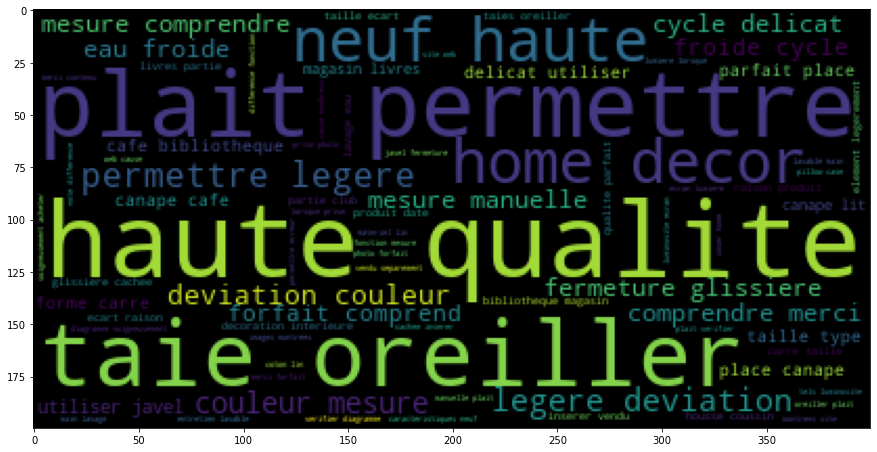

In [22]:
classe_1920 = train[train['prdtypecode']==1920]
display(classe_1920.head(5))

text_classe_1920 = ""
for words in classe_1920.text : 
    text_classe_1920 += words

# Générer et afficher le nuage de mots pour la colonne DESIGNATION

plt.figure(figsize= (15,15)) # Initialisation d'une figure
wc.generate(text_classe_1920)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

designation description   productid  \
16  Walter Scott Oeuvres Complètes Tomes 3456 10 E...        <NA>  3735707499   
51             One Piece Log 36 "Impel Down Partie 2"        <NA>  4086457567   
54                Fate/Zero - Lot Mangas - Tome 1 À 5        <NA>  3691441491   
57                    Lot De 5 Livres Grans Peintres         <NA>  1810701779   
61  Lot Pf38 - 15 Marque-Pages (Illustrations Vint...        <NA>  2255444083   

       imageid                                               text  prdtypecode  
16  1239242410               walter scott oeuvres completes tomes         2403  
51  1288958984                         one piece log impel partie         2403  
54  1234869213                          fate zero lot mangas tome         2403  
57  1102910727                          lot livres grans peintres         2403  
61  1133554532  lot marque pages illustrations vintage enfants...         2403

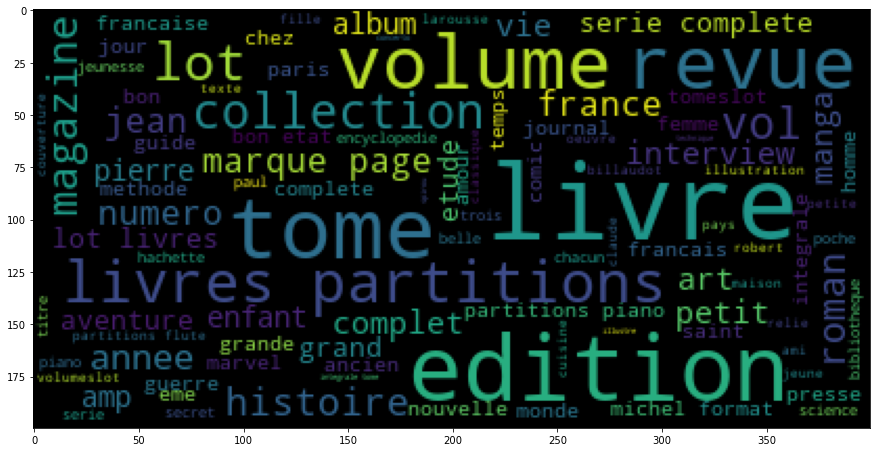

In [23]:
classe_2403 = train[train['prdtypecode']==2403]
display(classe_2403.head(5))

text_classe_2403 = ""
for words in classe_2403.text : 
    text_classe_2403 += words

# Générer et afficher le nuage de mots pour la colonne DESIGNATION

plt.figure(figsize= (15,15)) # Initialisation d'une figure
wc.generate(text_classe_2403)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

designation  \
18  Power Rangers Rouge Force Mystic Figurine Tran...   
23                          Véhicule Star Wars A-Ast5   
66                             Magnet Europe Paris 44   
72           Lampe Star Wars - Lampe Neon Sabre Laser   
98  It - Bobble Head Pop N° 539 - Beverly With Key...   

                                          description   productid     imageid  \
18                                               <NA>    91015572   857195931   
23    véhicule vintage de la saga star wars le A-AST5   279822475   978593209   
66                                               <NA>    46540267   332521213   
72  Lampe néon taille env. 22 x 28 cm avec base d¿...  1565732417  1090968564   
98                                               <NA>  3294453709  1204635212   

                                                 text  prdtypecode  
18  power rangers rouge force mystic figurine tran...         1140  
23  vehicule star wars ast vehicule vintage saga s...         1140  
66                                magnet europe paris         1140  
72  lampe star wars neon sabre laser neon taille e...         1140  
98               bobble head pop beverly key necklace         1140

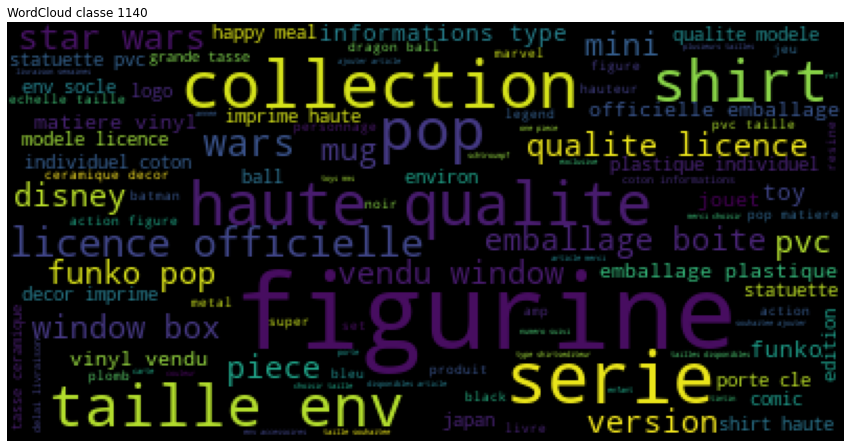

In [24]:
classe_1140 = train[train['prdtypecode']==1140]
display(classe_1140.head(5))

text_classe_1140 = ""
for words in classe_1140.text : 
    text_classe_1140 += words

# Générer et afficher le nuage de mots pour la colonne DESIGNATION

plt.figure(figsize= (15,15)) # Initialisation d'une figure
wc.generate(text_classe_1140)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.title('WordCloud classe 1140',loc='left')
plt.axis('off')
plt.show()

designation  \
20   Kit de désinfection pour piscines enfants 20990   
39             Bouée gonflable River tube - OOGARDEN   
53                        Testeur électronique de pH   
58                 Pompe de filtration Speck Badu 95   
64  AstralCom 1 CV Mono de DAB - Surpresseur piscine   

                                          description   productid     imageid  \
20                                               <NA>  3936362802  1268740880   
39  Bouée gonflable River tube en PVC idéale pour ...  3147314797  1225887302   
53  Utilisation du Testeur électronique de pHGrâce...   207151480   941622055   
58                                               <NA>  4128438373  1295960377   
64  Tension (V) : Monophasé - 230 V  Puissance : 1...  1857269337  1105831362   

                                                 text  prdtypecode  
20                  kit desinfection piscines enfants         2583  
39  bouee gonflable river tube oogarden pvc ideale...         2583  
53  testeur electronique utilisation phgrace teste...         2583  
58                        pompe filtration speck badu         2583  
64  astralcom mono dab surpresseur piscine tension...         2583

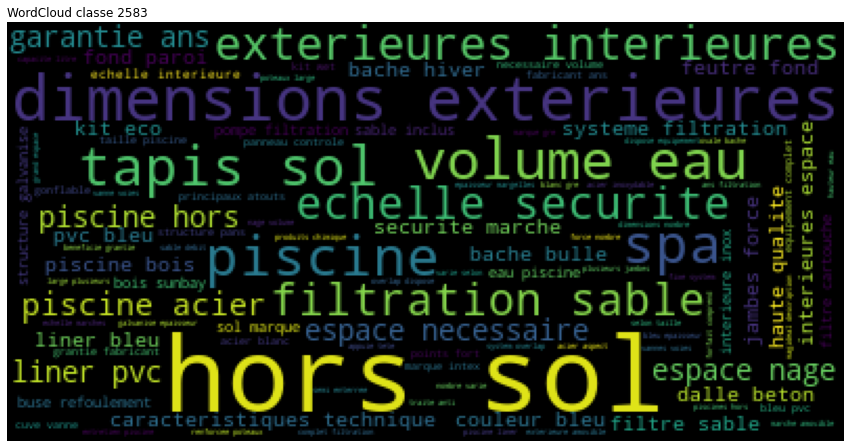

In [25]:
classe_2583  = train[train['prdtypecode']== 2583 ]
display(classe_2583 .head(5))

text_classe_2583  = ""
for words in classe_2583 .text : 
    text_classe_2583  += words

# Générer et afficher le nuage de mots pour la colonne DESIGNATION

plt.figure(figsize= (15,15)) # Initialisation d'une figure
wc.generate(text_classe_2583 )           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.title('WordCloud classe 2583', loc='left')
plt.axis('off')
plt.show()

designation  \
22   Le Seigneur Des Anneaux Figurine En Plomb À Pe...   
41                  Présentoir À Biscuits Et Chocolats   
106  Comtes Vampires Lahmiane À Pied Et Montée Lahm...   
154   Mournblade - Ecran Et Cartes Des Jeunes Royaumes   
524  Warhammer 40000 ( 40k ) - Exo Armure Xv88 Broa...   

                                           description   productid  \
22                                                <NA>  1893048509   
41                                                <NA>  1548294503   
106                                               <NA>  4187799604   
154                                               <NA>  4180534759   
524  Ce kit contient 91 composants en plastique ain...   255257554   

        imageid                                               text  \
22   1110089245  seigneur anneaux figurine plomb peindre socle sam   
41   1092313319                      presentoir biscuits chocolats   
106  1312712907  comtes vampires lahmiane pied montee lahmia va...   
154  1309774406            mournblade ecran cartes jeunes royaumes   
524   968831698  warhammer exo armure broadside kit contient co...   

     prdtypecode  
22          1180  
41          1180  
106         1180  
154         1180  
524         1180

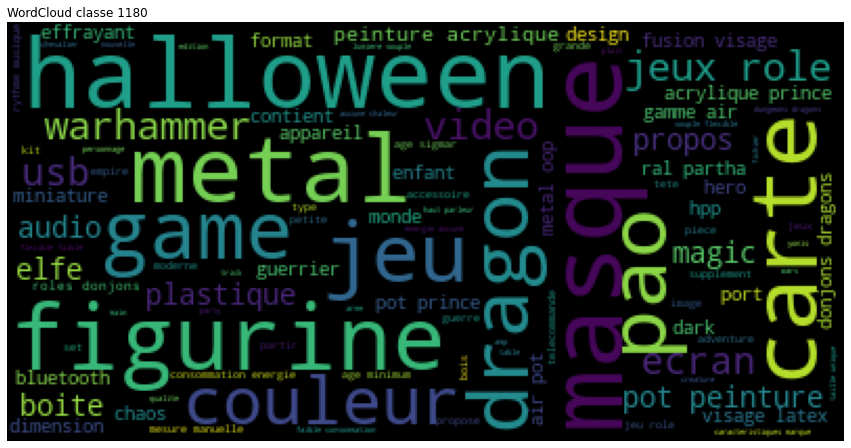

In [26]:
classe_1180  = train[train['prdtypecode']==1180 ]
display(classe_1180 .head(5))

text_classe_1180  = ""
for words in classe_1180 .text : 
    text_classe_1180  += words

# Générer et afficher le nuage de mots pour la colonne DESIGNATION

plt.figure(figsize= (15,15)) # Initialisation d'une figure
wc.generate(text_classe_1180 )           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.title('WordCloud classe 1180',loc='left')
plt.axis('off')
plt.show()

designation  \
24   Mini Wifi 720p Caméra Drone Rc Quadcopter 24 G...   
59   Moakoada®Body Wrap Peau Autocollant Decal Pour...   
63   2.4g 6-Axis Wifi Fpv Drone 0.3mp Caméra Terre-...   
81   Maquette D'avion Protective Silicone Cover Cas...   
104  Noch - 14222 - Modélisme Ferroviaire - Passere...   

                                           description   productid  \
24   Mini Wifi 720P Caméra Drone RC Quadcopter 24 G...  3748203527   
59   Body Wrap peau autocollant Decal Pour DJI Phan...  3893192098   
63                                                <NA>  3951008374   
81   Silicone CoverCase With Handheld Lanyard For D...  4122557333   
104                                               <NA>   516394759   

        imageid                                               text  \
24   1240721678  mini wifi camera drone quadcopter ghz axis gyr...   
59   1260268384  moakoada body wrap peau autocollant decal dji ...   
63   1268466271  axis wifi fpv drone camera terre air saut mode...   
81   1294197004  maquette avion protective silicone cover case ...   
104  1019306612         modelisme ferroviaire passerelle laser cut   

     prdtypecode  
24          1300  
59          1300  
63          1300  
81          1300  
104         1300

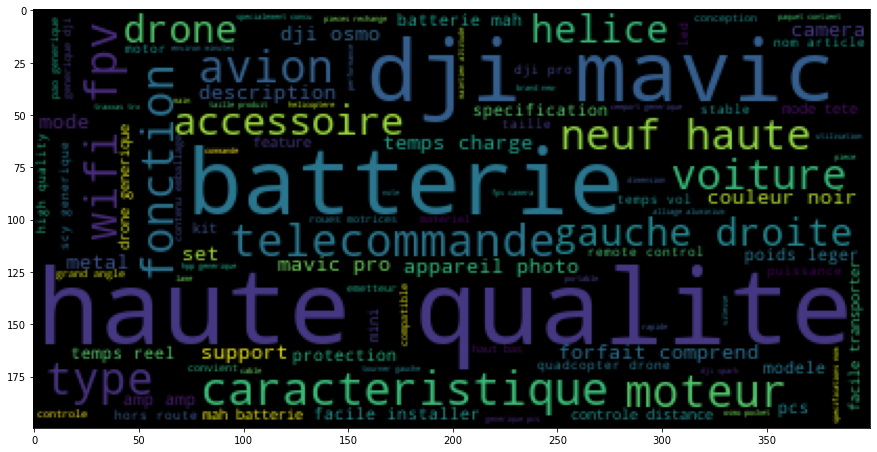

In [27]:
classe_1300   = train[train['prdtypecode']==1300  ]
display(classe_1300  .head(5))

text_classe_1300   = ""
for words in classe_1300  .text : 
    text_classe_1300   += words

# Générer et afficher le nuage de mots pour la colonne DESIGNATION

plt.figure(figsize= (15,15)) # Initialisation d'une figure
wc.generate(text_classe_1300  )           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

designation description  \
25                  Dsi + Chargeur + Sacoche + 12 Jeux        <NA>   
71             Xbox One 500 Giga Avc 3jeux Une Manette        <NA>   
86   Xbox 360 Élite Noire 250go + 5 Jeux + Une Mane...        <NA>   
238  Clementoni - 62580.2 - Jouet De Premier Age - ...        <NA>   
324  Lot - Baldur&#39;S Gate - Dark Alliance Ii - 2...        <NA>   

      productid     imageid  \
25    211334790   948608572   
71   1366398939  1076659035   
86    298737347   991347135   
238  1692178656  1098685633   
324  3040165356  1186950504   

                                                  text  prdtypecode  
25                           dsi chargeur sacoche jeux         2462  
71                      xbox one giga avc jeux manette         2462  
86                 xbox elite noire jeux manette micro         2462  
238  clementoni jouet premier age tablette monster ...         2462  
324  lot baldur gate dark alliance microsoft xbox j...         2462

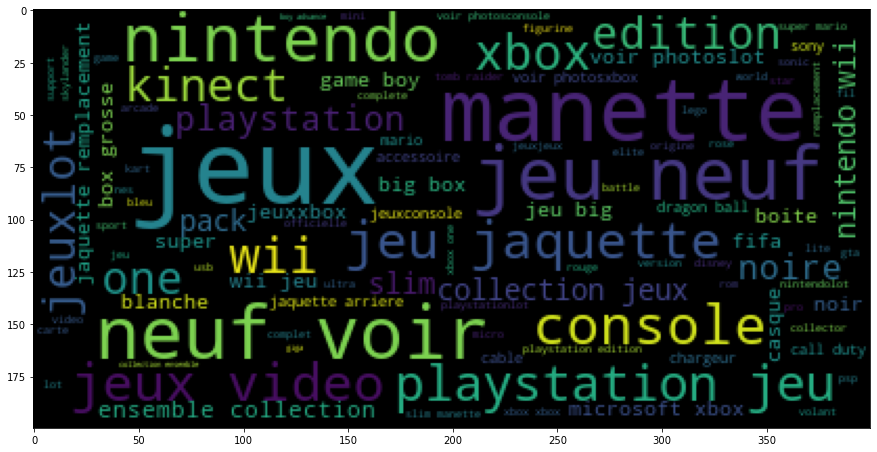

In [28]:
classe_2462   = train[train['prdtypecode']==2462 ]
display(classe_2462  .head(5))

text_classe_2462   = ""
for words in classe_2462  .text : 
    text_classe_2462   += words

# Générer et afficher le nuage de mots pour la colonne DESIGNATION

plt.figure(figsize= (15,15)) # Initialisation d'une figure
wc.generate(text_classe_2462 )           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

designation description  \
29   Dragon Ball Super - Bt3-070 - C-13 Les Prémiss...        <NA>   
48            Dragon Ball Z - Serie 3 - 13 - Francaise        <NA>   
109  N° 98 Roberto Pereyra  - Juventus - Adrenalyn ...        <NA>   
115  Drakôn À Écailles De Chrome - Rare - Sombracie...        <NA>   
155  Scott Mitchell - Cincinnati Bengals - 2001 Upp...        <NA>   

      productid     imageid  \
29   3226779852  1202890774   
48     73334276   844838682   
109   871281071  1046068518   
115     4293237   226693630   
155   522627969  1020456966   

                                                  text  prdtypecode  
29            dragon ball super premisses peur commune         1160  
48                         dragon ball serie francaise         1160  
109            roberto pereyra juventus adrenalyn fifa         1160  
115       drakon ecailles chrome rare sombracier magic         1160  
155  scott mitchell cincinnati bengals upper deck m...         1160

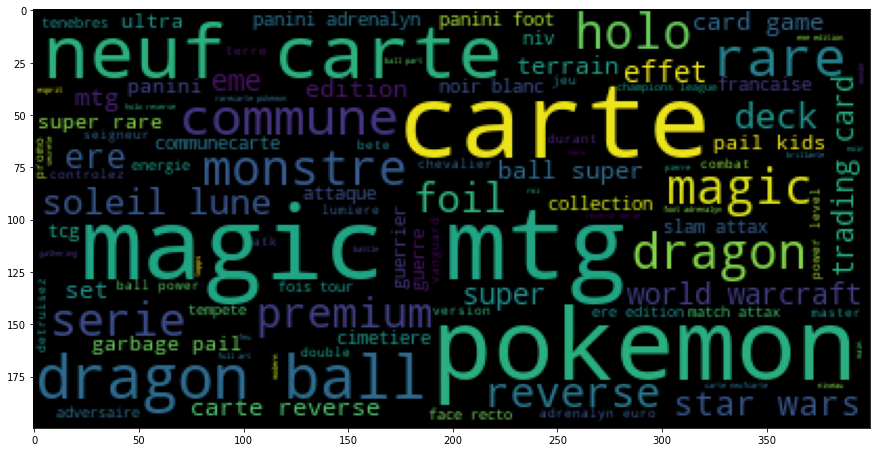

In [29]:
classe_1160   = train[train['prdtypecode']==1160]
display(classe_1160  .head(5))

text_classe_1160   = ""
for words in classe_1160.text : 
    text_classe_1160   += words

# Générer et afficher le nuage de mots pour la colonne DESIGNATION

plt.figure(figsize= (15,15)) # Initialisation d'une figure
wc.generate(text_classe_1160 )           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

designation  \
30  Lampe De Lecture Rechargeable Led Lampe De Bea...   
35  Decoration De Noel Christmas Snowman Kitchen T...   
36  30 Spots Encastrable Orientable Blanc Avec Gu1...   
67  Happy Halloween Sorcière Accueil Stickers Mura...   
77  Boite A Savons Metal Collection Moulin Rouge C...   

                                          description   productid     imageid  \
30  Nom de la marque:SYTH<br />Ampoules incluses:O...  4198487181  1313675704   
35  Christmas Snowman Kitchen Table Chair Covers H...  4211197055  1317753478   
36  <b>Lot de 30 Spots encastrable orientable BLAN...  3847254406  1264434293   
67  Happy Halloween Sorcière Accueil amovible Wall...  4200117001  1313789346   
77                                               <NA>   684292602  1035262984   

                                                 text  prdtypecode  
30  lampe lecture rechargeable led beaute protecti...         2060  
35  decoration noel christmas snowman kitchen tabl...         2060  
36  spots encastrable orientable blanc led eqv fro...         2060  
67  happy halloween sorciere accueil stickers mura...         2060  
77  boite savons metal collection moulin rouge cab...         2060

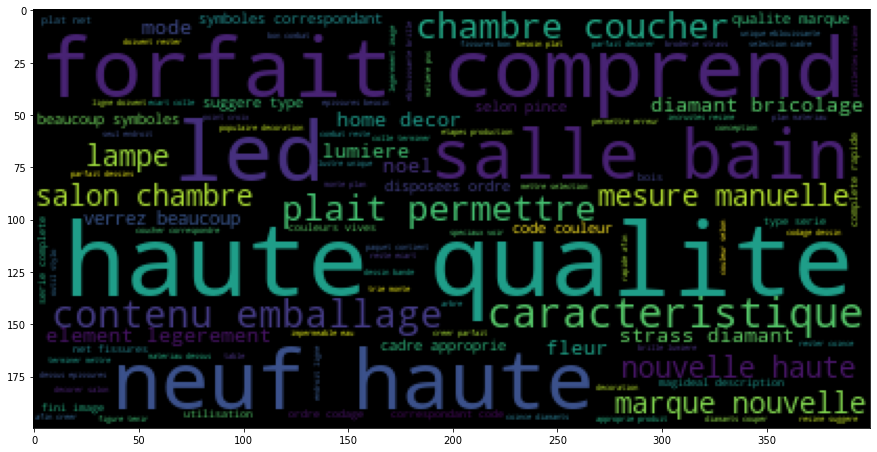

In [30]:
classe_2060   = train[train['prdtypecode']==2060]
display(classe_2060  .head(5))

text_classe_2060   = ""
for words in classe_2060.text : 
    text_classe_2060   += words

# Générer et afficher le nuage de mots pour la colonne DESIGNATION

plt.figure(figsize= (15,15)) # Initialisation d'une figure
wc.generate(text_classe_2060 )           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

designation  \
31                            X-Men 3 - The Movie   
34                          The Lord Or Thé Rings   
47   Shin Masoukishin Panzer Warfare (Import Jap)   
50                         Jeu Pc Cd-Rom : Azteca   
101  Innercity Burnout [Import Allemand] [Jeu Pc]   

                                           description   productid  \
31                                                <NA>    49132716   
34                                                <NA>  4237073471   
47                                                <NA>     8870838   
50                                                <NA>  4232229083   
101  <br>Attention !!! Ce produit est un import  si...   190095382   

        imageid                                               text  \
31    874730792                                          men movie   
34   1324384878                                         lord rings   
47    868167157         shin masoukishin panzer warfare import jap   
50   1322918708                                     jeu rom azteca   
101   933239989  innercity burnout import allemand jeu attentio...   

     prdtypecode  
31            40  
34            40  
47            40  
50            40  
101           40

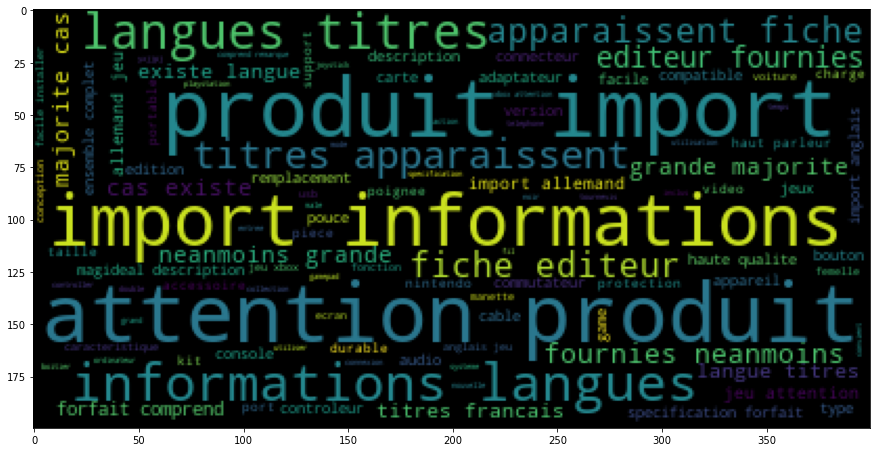

In [31]:
classe_40   = train[train['prdtypecode']==40]
display(classe_40  .head(5))

text_classe_40   = ""
for words in classe_40.text : 
    text_classe_40   += words

# Générer et afficher le nuage de mots pour la colonne DESIGNATION

plt.figure(figsize= (15,15)) # Initialisation d'une figure
wc.generate(text_classe_40)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

designation  \
40   Mini Console De Jeux Double Joueurs 8 Bits Con...   
180  Nouvelle Console De Jeu Vidéo Portable Rétro 1...   
270  5.1 Pouces Hd Écran Double Joystick Lecteur De...   
299  Lecteur Nostalgique Mini Lecteurs De Jeux Vidé...   
375  4.3 ''multi-Fonction Portable Jeu Console De J...   

                                           description   productid  \
40   Nom de la marque:NoEnName_Null<br />Affichage ...  4200874030   
180  Affichage de couleur:Oui<br />Paquet:Oui<br />...  4200877294   
270  Numéro du modèle:model 310<br />Taille de l&#3...  4200875606   
299  Affichage de couleur:Oui<br />Paquet:Oui<br />...  4200881171   
375  Affichage de couleur:Oui<br />Nom de la marque...  4200871264   

        imageid                                               text  \
40   1316147329  mini console jeux double joueurs bits video en...   
180  1316199211  nouvelle console jeu video portable retro lect...   
270  1316160872  pouces ecran double joystick lecteur jeu poche...   
299  1316258822  lecteur nostalgique mini lecteurs jeux video p...   
375  1316117316  multi fonction portable jeu console memoire co...   

     prdtypecode  
40            60  
180           60  
270           60  
299           60  
375           60

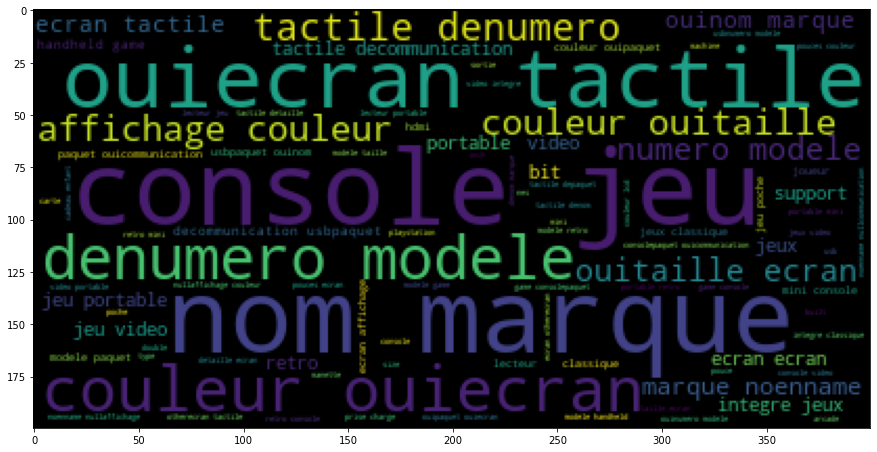

In [32]:
classe_60   = train[train['prdtypecode']== 60]
display(classe_60.head(5))

text_classe_60   = ""
for words in classe_60.text : 
    text_classe_60   += words

# Générer et afficher le nuage de mots pour la colonne DESIGNATION

plt.figure(figsize= (15,15)) # Initialisation d'une figure
wc.generate(text_classe_60)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

designation  \
62   Largo 3 En 1 Poussette Combinée Parasol Siège ...   
124                       Wood Puzzle 3d Lion 7 Pièces   
138  Siège Auto Et Rehausseur Disney Avec Dossier G...   
143                       Coffre À Jouet En Osier Gris   
191                     Tigex Bavoir A Enfiler 6 Mois+   

                                           description   productid  \
62   Largo Poussette 3 en 1 <br> Combinée combinée ...   845432910   
124                                               <NA>   256504653   
138                                               <NA>  1191766690   
143                                               <NA>  2932591602   
191                                               <NA>  2033308192   

        imageid                                               text  \
62   1102363799  largo poussette combinee parasol siege auto ca...   
124  1318433614                            wood puzzle lion pieces   
138  1068285873  siege auto rehausseur disney dossier groupe fa...   
143  1173879377                            coffre jouet osier gris   
191  1121209482                          tigex bavoir enfiler mois   

     prdtypecode  
62          1320  
124         1320  
138         1320  
143         1320  
191         1320

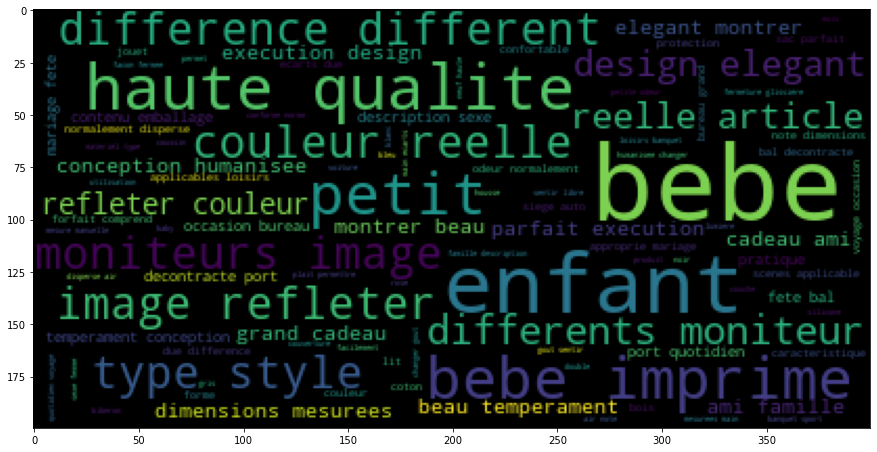

In [33]:
classe_1320   = train[train['prdtypecode']== 1320]
display(classe_1320.head(5))

text_classe_1320   = ""
for words in classe_1320.text : 
    text_classe_1320   += words

# Générer et afficher le nuage de mots pour la colonne DESIGNATION

plt.figure(figsize= (15,15)) # Initialisation d'une figure
wc.generate(text_classe_1320)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

designation  \
76   60ml Halloween Head Ghost Mélange Nuage Slime ...   
79   Squishies Adorable Pingouin Squeeze Rising Slo...   
114  Jouet Halloween Horror Grimace Night Terror Ma...   
120         Trampoline Berg Elite Inground Rouge 430cm   
125  1pc Leurres 9cm Plastique Hardbass Appâts 8 Co...   

                                           description   productid  \
76   60ML Halloween Head Ghost Mélange Nuage Slime ...  4010224699   
79   Squishies adorable pingouin lente hausse Squee...  4010221940   
114  Halloween Pumpkin Ice Cream Slow Rising Collec...  4173008727   
120  Le BERG Elite InGround est le meilleur trampol...  3493552571   
125  1pc Leurres 9cm plastique Hardbass Appâts 8 co...  3893243612   

        imageid                                               text  \
76   1276030225  halloween head ghost melange nuage slime putty...   
79   1276001955  squishies adorable pingouin squeeze rising slo...   
114  1307881449  jouet halloween horror grimace night terror ma...   
120  1217330555  trampoline berg elite inground rouge berg ingr...   
125  1260347142  leurres plastique hardbass appats couleurs min...   

     prdtypecode  
76          1302  
79          1302  
114         1302  
120         1302  
125         1302

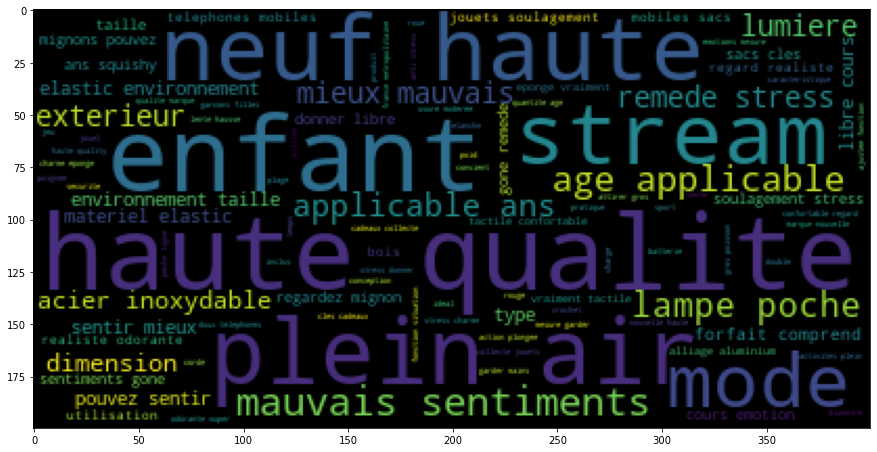

In [34]:
classe_1302  = train[train['prdtypecode']== 1302]
display(classe_1302.head(5))

text_classe_1302   = ""
for words in classe_1302.text : 
    text_classe_1302   += words

# Générer et afficher le nuage de mots pour la colonne DESIGNATION

plt.figure(figsize= (15,15)) # Initialisation d'une figure
wc.generate(text_classe_1302)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

designation  \
82                      Distributeur De Nourriture Tx2   
320  Chaîne Créative De Fission De Pied De Perroque...   
338  Mode Pet Keep Warm Amour Decorationcoat Chien ...   
354                 Matelas Pour Chiens Taille M Beige   
355            Ruban Multicolre Topline Plus Vert 40mm   

                                           description   productid  \
82   Pour chat et petit chien. Grâce au timer intég...   532980611   
320  <p><b>La description:</b></p><br /><p> 100% ne...  4183696764   
338  Mode Pet Garder au chaud l&#39;amour Decoratio...  4187459181   
354  <p>Ce matelas pour chiens donnera à vos animau...  3971616496   
355  AKO TopLine Plus garantit une bonne conductivi...  1631551337   

        imageid                                               text  \
82   1227615603  distributeur nourriture chat petit chien grace...   
320  1313629697  chaine creative fission pied perroquet oiseaux...   
338  1311500237  mode pet keep warm amour decorationcoat chien ...   
354  1270372881  matelas chiens taille beige matelas chiens don...   
355  1095049953  ruban multicolre topline vert ako topline gara...   

     prdtypecode  
82          2220  
320         2220  
338         2220  
354         2220  
355         2220

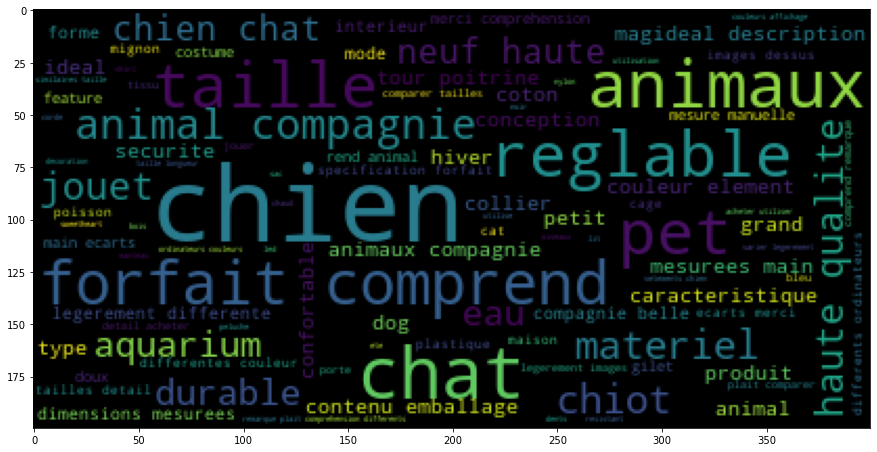

In [35]:
classe_2220  = train[train['prdtypecode']== 2220]
display(classe_2220.head(5))

text_classe_2220   = ""
for words in classe_2220.text : 
    text_classe_2220   += words

# Générer et afficher le nuage de mots pour la colonne DESIGNATION

plt.figure(figsize= (15,15)) # Initialisation d'une figure
wc.generate(text_classe_2220)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

designation  \
148  Motogp 14 - Season Pass (Extension) - Jeu En T...   
287  Snark Busters: High Society - Jeu En Télécharg...   
611  Crusader Kings Ii: Rajas Of India - Dlc - Jeu ...   
653   Rage Against The Zombies - Jeu En Téléchargement   
672           Last Day Of June - Jeu En Téléchargement   

                                           description   productid  \
148  NOTE : Nécessite le jeu original MotoGP 14 pou...  1711734999   
287  <p>L&#39;amour la jalousie et la vengeance se ...  1711732964   
611  NOTE : Nécessite le jeu original <b>Crusader K...  1711734886   
653  NOTE : code d&#39;activation à utiliser exclus...  1869938533   
672  <div> <p><strong>Note :</strong> code d&#39;ac...  3716121480   

        imageid                                               text  \
148  1100084859  motogp season pass extension jeu telechargemen...   
287  1100077279  snark busters high society jeu telechargement ...   
611  1100083529  crusader kings rajas india dlc jeu telechargem...   
653  1107916809  rage zombies jeu telechargement note code acti...   
672  1236934990  last day june jeu telechargement note code act...   

     prdtypecode  
148         2905  
287         2905  
611         2905  
653         2905  
672         2905

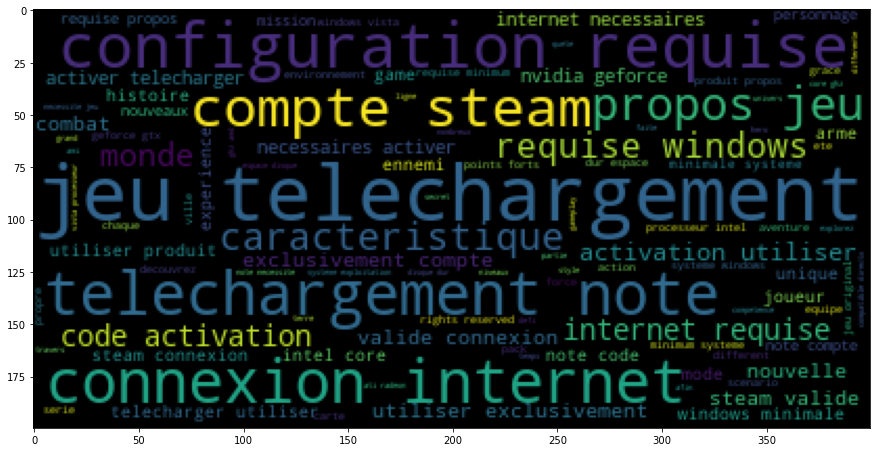

In [36]:
classe_2905  = train[train['prdtypecode']== 2905]
display(classe_2905.head(5))

text_classe_2905   = ""
for words in classe_2905.text : 
    text_classe_2905   += words

# Générer et afficher le nuage de mots pour la colonne DESIGNATION

plt.figure(figsize= (15,15)) # Initialisation d'une figure
wc.generate(text_classe_2905)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

designation  \
162            Tuyau à goutteur incorporé 16 mm x 25 m   
176  Taille-haies sans fil ComfortCut Li-18/60 lvré...   
272  Loft urban pot de fleur rond - 50 cm - bleu vi...   
275  Trou traversant Pince à sertir multifonction E...   
339        C/SEP ARRIERE GHE SUPERCHIEF B737117 AD.IHF   

                                           description   productid  \
162  Tuyau à goutteur incorporé  Caractéristiques -...  2091257012   
176  <p><strong>LIVRE SANS BATTERIE NI CHARGEUR</st...  2685362450   
272                                               <NA>  3397443643   
275  Décapage Artefact Électricien automatique Déca...  4202303891   
339                                               <NA>  1657064547   

        imageid                                               text  \
162  1125330542  tuyau goutteur incorpore caracteristiques dime...   
176  1166818974  taille haies fil comfortcut lvre batterie livr...   
272  1211397493             loft urban pot fleur rond bleu vintage   
275  1314512168  trou traversant pince sertir multifonction ser...   
339  1096608932                     sep arriere ghe superchief ihf   

     prdtypecode  
162         2585  
176         2585  
272         2585  
275         2585  
339         2585

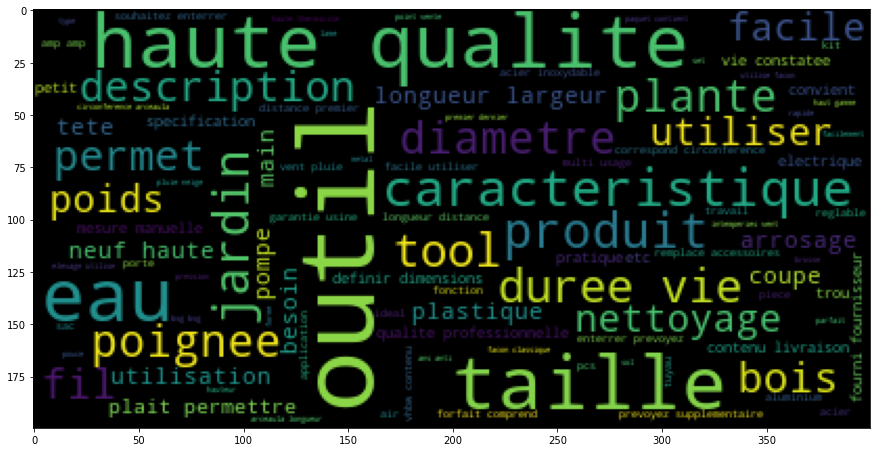

In [37]:
classe_2585  = train[train['prdtypecode']== 2585]
display(classe_2585.head(5))

text_classe_2585   = ""
for words in classe_2585.text : 
    text_classe_2585   += words

# Générer et afficher le nuage de mots pour la colonne DESIGNATION

plt.figure(figsize= (15,15)) # Initialisation d'une figure
wc.generate(text_classe_2585)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

designation  \
200  Lot De 5 Sachet Chewing Gum Pastèque Fini 100g...   
203  Tassimo Jacobs Espresso Rainforest Alliance Vé...   
406                  Dolce Gusto Espresso 16 Caps. 96g   
442  Twinings Gunpowder Thé Vert Menthe - Vrac/Boit...   
702  Haribo Gingembre-Citron Bonbons Bonbons Gélifi...   

                                           description   productid  \
200  Lot de 5 Sachet Chewing Gum Pastèque Fini 100g...  4151269724   
203  Tassimo Jacobs Espresso Rainforest Alliance Vé...  4055997671   
406  DOLCE GUSTO Espresso 16 Caps. 96g - 16 capsule...  1466897199   
442                                             <br />  2572664424   
702  Les bonbons Haribo gingembre-citron sont des b...  4056001141   

        imageid                                               text  \
200  1301255126  lot sachet chewing gum pasteque fini bonbon gl...   
203  1282285967  tassimo jacobs espresso rainforest alliance ve...   
406  1082357413  dolce gusto espresso caps dolce gusto capsules...   
442  1150288994    twinings gunpowder vert menthe vrac boite metal   
702  1282291447  haribo gingembre citron bonbons gelifies fruit...   

     prdtypecode  
200         1940  
203         1940  
406         1940  
442         1940  
702         1940

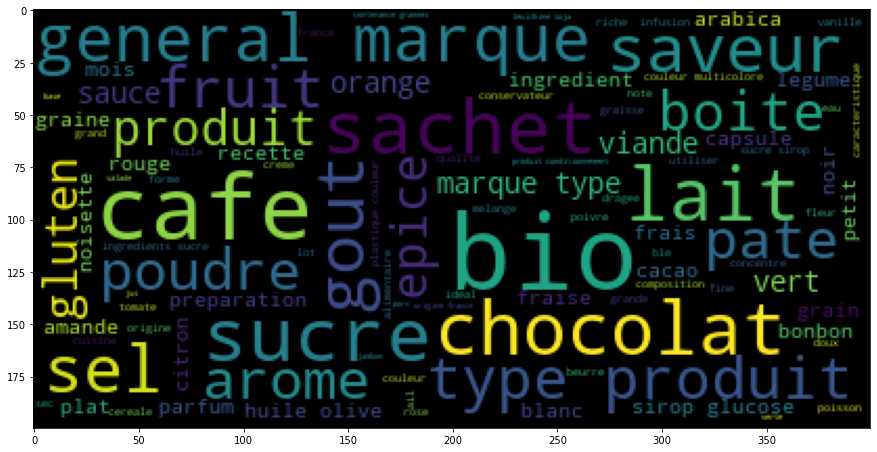

In [38]:
classe_1940  = train[train['prdtypecode']== 1940]
display(classe_1940.head(5))

text_classe_1940   = ""
for words in classe_1940.text : 
    text_classe_1940   += words

# Générer et afficher le nuage de mots pour la colonne DESIGNATION

plt.figure(figsize= (15,15)) # Initialisation d'une figure
wc.generate(text_classe_1940)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

designation  \
257   Enfants bébé tout-petits garçons Bébés filles ...   
289   9 Balles de Baby Foot Bonzini Balles en Liège ...   
945   Nouveau-né Bébé Garçons Filles Cartoon animaux...   
989   Cavalier 3 PCS / Set 23g En Aluminium Arbres E...   
1333           Ailette Fléchette Marathon Urban-Harrows   

                                            description   productid  \
257   Enfants bébé Tout-petit bébé Garçons Filles Ca...  3898725495   
289   Diamètre de 35mm. Balles de baby foot en liège...   136255802   
945   Nouveau-nés garçons Bébés filles Cartoon anima...  3898728616   
989   Cavalier 3 PCS / Set 23g En Aluminium Arbres E...  3578689082   
1333  Ailette Marathon pour fléchette. La conception...   149878775   

         imageid                                               text  \
257   1261419198  enfants bebe petits garcons bebes filles carto...   
289    890156155  balles baby foot bonzini liege jaunes bonzini ...   
945   1261426616  bebe garcons filles cartoon animaux chaussette...   
989   1223057800  cavalier pcs set aluminium arbres laiton tonne...   
1333   905285490  ailette flechette marathon urban harrows flech...   

      prdtypecode  
257          1301  
289          1301  
945          1301  
989          1301  
1333         1301

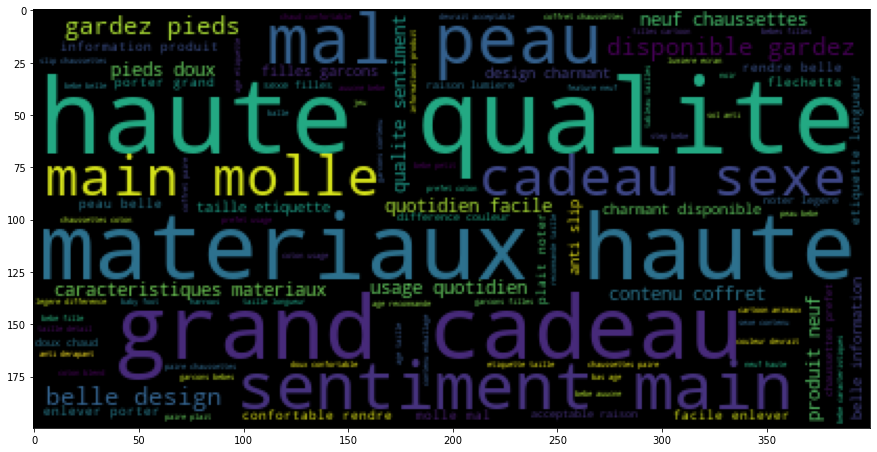

In [39]:
classe_1301 = train[train['prdtypecode']== 1301]
display(classe_1301.head(5))

text_classe_1301   = ""
for words in classe_1301.text : 
    text_classe_1301   += words

# Générer et afficher le nuage de mots pour la colonne DESIGNATION

plt.figure(figsize= (15,15)) # Initialisation d'une figure
wc.generate(text_classe_1301)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

***Add labels***

A partir des différents Worlclouds , nous pouvons retrouver les différentes catégories des produits.
Cela devra être consolider avec la dataViz des images. 

In [12]:
classe2220 = train[train['prdtypecode']== 2220]
classe2220.shape

(824, 6)

In [13]:
#Dictionary of prdtypecode and their corresponding categories
dict_prdtypecode = {"prdtypecode" : [50, 2705, 2522, 2582, 1560, 1281, 1920, 1280, 1140, 1300, 2060, 2583,
                                     60, 1320, 2280, 1302, 2220, 40, 2905, 2585, 1940, 1160, 1301, 10, 1180,
                                     2403, 2462],                 
            

 
                     "Label" : ["video games accessories", "books", "stationery", "furniture kitchen and garden", 
                               "interior furniture and bedding", "board games", "interior accessories",
                               "toys for children","figurines and Toy Pop", "remote controlled models", "decoration interior",
                               "piscine spa","games and consoles", "early childhood", "magazines", "toys, outdoor playing, clothes",
                               "supplies for domestic animals", "imported video games", "online distribution of video games",
                               "gardening and DIY","Food","playing cards", "accessories children", "adult books",
                               "figurines, masks and role playing games", "children books and magazines",
                                "games"]                                   
                   }

df_class = pd.DataFrame(data=dict_prdtypecode)
df_class

# Create dictionnay from prdtypecode and corresponding labels
dict_code_label = dict(zip(df_class.prdtypecode, df_class.Label))

In [14]:
dict_code_label

{50: 'video games accessories',
 2705: 'books',
 2522: 'stationery',
 2582: 'furniture kitchen and garden',
 1560: 'interior furniture and bedding',
 1281: 'board games',
 1920: 'interior accessories',
 1280: 'toys for children',
 1140: 'figurines and Toy Pop',
 1300: 'remote controlled models',
 2060: 'decoration interior',
 2583: 'piscine spa',
 60: 'games and consoles',
 1320: 'early childhood',
 2280: 'magazines',
 1302: 'toys, outdoor playing, clothes',
 2220: 'supplies for domestic animals',
 40: 'imported video games',
 2905: 'online distribution of video games',
 2585: 'gardening and DIY',
 1940: 'Food',
 1160: 'playing cards',
 1301: 'accessories children',
 10: 'adult books',
 1180: 'figurines, masks and role playing games',
 2403: 'children books and magazines',
 2462: 'games'}

In [48]:
df_class_labels= df_class.sort_values('prdtypecode', ascending=True) 
#df_class_labels= df_class.sort_index() 
df_class_labels

prdtypecode                                    Label
23           10                              adult books
17           40                     imported video games
0            50                  video games accessories
12           60                       games and consoles
8          1140                    figurines and Toy Pop
21         1160                            playing cards
24         1180  figurines, masks and role playing games
7          1280                        toys for children
5          1281                              board games
9          1300                 remote controlled models
22         1301                     accessories children
15         1302           toys, outdoor playing, clothes
13         1320                          early childhood
4          1560           interior furniture and bedding
6          1920                     interior accessories
20         1940                                     Food
10         2060                      decoration interior
16         2220            supplies for domestic animals
14         2280                                magazines
25         2403             children books and magazines
26         2462                                    games
2          2522                               stationery
3          2582             furniture kitchen and garden
11         2583                              piscine spa
19         2585                        gardening and DIY
1          2705                                    books
18         2905       online distribution of video games

In [45]:
df_class_labels.to_pickle(path + 'train_class_by_labels.pkl')
df_class_labels.to_csv(path + 'train_class_by_labels.csv')

In [260]:
train['labels'] = train['prdtypecode'].map(dict_code_label)

In [15]:
classe2220 = train[train['prdtypecode']== 2220]
classe2220.shape

(824, 6)

In [261]:
train.head()

designation  \
0  Olivia: Personalisiertes Notizbuch / 150 Seite...   
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   
2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
3  Peluche Donald - Europe - Disneyland 2000 (Mar...   
4                               La Guerre Des Tuques   

                                         description   productid     imageid  \
0                                               <NA>  3804725264  1263597046   
1                                               <NA>   436067568  1008141237   
2  PILOT STYLE Touch Pen de marque Speedlink est ...   201115110   938777978   
3                                               <NA>    50418756   457047496   
4  Luc a des id&eacute;es de grandeur. Il veut or...   278535884  1077757786   

                                                text  prdtypecode  \
0  olivia personalisiertes notizbuch seiten punkt...           10   
1  journal arts art marche salon art asiatique pa...         2280   
2  grand stylet ergonomique bleu gamepad nintendo...           50   
3  peluche donald europe disneyland marionnette d...         1280   
4  guerre tuques luc grandeur veut organiser jeu ...         2705   

                    labels  
0              adult books  
1                magazines  
2  video games accessories  
3        toys for children  
4                    books

In [16]:
unique, counts = np.unique(train['prdtypecode'], return_counts=True)
dict(zip(unique, counts))

{10: 3116,
 40: 2508,
 50: 1681,
 60: 832,
 1140: 2671,
 1160: 3953,
 1180: 764,
 1280: 4870,
 1281: 2070,
 1300: 5045,
 1301: 807,
 1302: 2491,
 1320: 3241,
 1560: 5073,
 1920: 4303,
 1940: 803,
 2060: 4993,
 2220: 824,
 2280: 4760,
 2403: 4774,
 2462: 1421,
 2522: 4989,
 2582: 2589,
 2583: 10209,
 2585: 2496,
 2705: 2761,
 2905: 872}

In [263]:
train_cat = pd.DataFrame(train.groupby('labels').count()['prdtypecode'])

In [264]:
train_cat.head()

prdtypecode
labels                           
Food                          803
accessories children          807
adult books                  3116
board games                  2070
books                        2761

In [265]:
train_cat.rename(columns = {'prdtypecode' : 'Total'},inplace = True)

In [266]:
train_cat

Total
labels                                        
Food                                       803
accessories children                       807
adult books                               3116
board games                               2070
books                                     2761
children books and magazines              4774
decoration interior                       4993
early childhood                           3241
figurines and Toy Pop                     2671
figurines, masks and role playing games    764
furniture kitchen and garden              2589
games                                     1421
games and consoles                         832
gardening and DIY                         2496
imported video games                      2508
interior accessories                      4303
interior furniture and bedding            5073
magazines                                 4760
online distribution of video games         872
piscine spa                              10209
playing cards                             3953
remote controlled models                  5045
stationery                                4989
supplies for domestic animals              824
toys for children                         4870
toys, outdoor playing, clothes            2491
video games accessories                   1681

***Save final train***

Le dataframe final compte des données train, les données y_train(classes) ainsi que les labels

In [267]:
train.to_pickle(path + 'train_cleaned&Labels_V1.pkl')
train.to_csv(path + 'train_cleaned&Labels_V1.csv')

